In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/other/

Mounted at /content/drive
/content/drive/MyDrive/other


In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import random as rd
import copy
import time

from diffusion_models import Weighted_Cascade, Independent_Cascade, Decreasing_Cascade, linear_threshold, general_threshold, Trivalency_Model_Higher_Prob

In [3]:
def Naive_Greedy(g, k, model_type, num_simulations=1):
    if(model_type == 'IC'):
        model = Independent_Cascade()
    elif(model_type == 'DC'):
        model = Decreasing_Cascade()
    elif(model_type == 'TR'):
        model = Trivalency_Model_Higher_Prob()
    elif(model_type == 'WC'):
        model = Weighted_Cascade()
    elif(model_type == 'LT'):
        model = linear_threshold()
    elif(model_type == 'GT'):
        model = general_threshold()
    model.fit(g)
    max_nodes = []
    times = []
    start_time = time.time()
    for i in range(k):
        max_num = 0
        for node in g.nodes() - set(max_nodes):
            if(model_type == 'IC' or model_type == 'DC' or model_type == 'TR' or model_type == 'WC'):
              activate_nums = model.monte_carlo_diffusion_step(max_nodes + [node], max_step=1, num_simulations=num_simulations)
            elif(model_type == 'LT'):
              _, activate_nums = model.diffusion_step(max_nodes + [node], threshold = 0.1, max_step=1)
            else:
              _, activate_nums = model.diffusion_step(max_nodes + [node], max_step=1)
            if(len(activate_nums) > 1 and activate_nums[1] > max_num):
                max_num = activate_nums[1]
                max_node = node
        max_nodes.append(max_node)
        times.append(time.time() - start_time)
        print('Greedy: ', i+1, ' time: ', times[-1], ' new node: ', max_nodes[-1])
    return max_nodes, times

In [4]:
G = nx.read_gml('PB2020.gml')
G = G.reverse()

In [ ]:
max_nodes_IC, times_IC = Naive_Greedy(G, 20, 'IC', num_simulations=10)
print(max_nodes_IC)

Greedy:  1  time:  10.741265773773193
Greedy:  2  time:  236.766015291214
Greedy:  3  time:  627.04882645607
Greedy:  4  time:  1146.5669751167297
Greedy:  5  time:  1785.7016961574554
Greedy:  6  time:  2523.2258718013763
Greedy:  7  time:  3351.641788005829
Greedy:  8  time:  4245.376266717911
Greedy:  9  time:  5212.538978815079
Greedy:  10  time:  6237.875088214874
Greedy:  11  time:  7317.844819784164
Greedy:  12  time:  8447.575536966324
Greedy:  13  time:  9625.548919200897
Greedy:  14  time:  10851.33715724945
Greedy:  15  time:  12123.000044822693
Greedy:  16  time:  13442.503648996353
Greedy:  17  time:  14809.777120113373
Greedy:  18  time:  16218.910614013672
Greedy:  19  time:  17672.560995817184
Greedy:  20  time:  19170.619923830032
['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012', 'ProudBoysGBG', 'ProudBoysUS', 'ProudBoyzLondon', 'DetroitProudBoy', 'Father_Rhyme', 'ColoradoPOYB', 'Proudboy13', 'AWallfred', 'p

In [8]:
max_nodes_IC = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012', 'ProudBoysGBG', 'ProudBoysUS', 'ProudBoyzLondon', 'DetroitProudBoy', 'Father_Rhyme', 'ColoradoPOYB', 'Proudboy13', 'AWallfred', 'pullarkkat', 's817m', 'Somerled10', 'CodyBarnes13', 'GunsGodandTexas']
times_IC = [10.741265773773193, 236.766015291214, 627.04882645607, 1146.5669751167297, 1785.7016961574554, 2523.2258718013763, 3351.641788005829, 4245.376266717911, 5212.538978815079, 6237.875088214874,
       7317.844819784164, 8447.575536966324, 9625.548919200897, 10851.33715724945, 12123.000044822693, 13442.503648996353, 14809.777120113373, 16218.910614013672, 17672.560995817184, 19170.619923830032]

In [ ]:
plt.fig(figsize=(12, 8))
x = np.arange(1, 21)
plt.plot(x, times_IC)

In [ ]:
max_nodes_DC, times_DC = Naive_Greedy(G, 20, 'DC', num_simulations=10)
print(max_nodes_DC)
print(times_DC)

Greedy:  1  time:  14.71357774734497  new node:  principe_giovan
Greedy:  2  time:  341.92752385139465  new node:  Premises187
Greedy:  3  time:  883.5976860523224  new node:  MoralDK
Greedy:  4  time:  1604.629472732544  new node:  proudboy_
Greedy:  5  time:  2461.862696647644  new node:  enrique_tarrio
Greedy:  6  time:  3426.686062335968  new node:  GavinM_ProudBoy
Greedy:  7  time:  4488.1514637470245  new node:  proudboy2012
Greedy:  8  time:  5628.830832004547  new node:  ProudBoysGBG
Greedy:  9  time:  6839.51228928566  new node:  ProudBoysUS
Greedy:  10  time:  8111.640333890915  new node:  ProudBoyzLondon
Greedy:  11  time:  9430.324719429016  new node:  DetroitProudBoy
Greedy:  12  time:  10844.845517396927  new node:  Father_Rhyme
Greedy:  13  time:  12300.381844520569  new node:  ColoradoPOYB
Greedy:  14  time:  13789.093884468079  new node:  Proudboy13
Greedy:  15  time:  15337.097647666931  new node:  RoryWeb1
Greedy:  16  time:  16933.31753540039  new node:  fidelbogen


In [7]:
max_nodes_DC = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012', 'ProudBoysGBG', 'ProudBoysUS', 'ProudBoyzLondon', 'DetroitProudBoy', 'Father_Rhyme', 'ColoradoPOYB', 'Proudboy13', 'RoryWeb1', 'fidelbogen', 'HomeCoffeeGeek', 'DeathsquadMn', 'ZvoneCizl', 'JuanYsidroGalva']
times_DC = [14.71357774734497, 341.92752385139465, 883.5976860523224, 1604.629472732544, 2461.862696647644, 3426.686062335968, 4488.1514637470245, 5628.830832004547, 6839.51228928566, 8111.640333890915, 9430.324719429016, 10844.845517396927, 12300.381844520569, 13789.093884468079, 15337.097647666931, 16933.31753540039, 18599.448838949203, 20311.356774568558, 22050.487572193146, 23826.209863185883]

In [ ]:
max_nodes_WC, times_WC = Naive_Greedy(G, 20, 'WC', num_simulations=10)
print(max_nodes_WC)

Greedy:  1  time:  10.501221656799316
Greedy:  2  time:  235.98831987380981
Greedy:  3  time:  625.4327020645142
Greedy:  4  time:  1132.241504907608
Greedy:  5  time:  1809.7334263324738
Greedy:  6  time:  2598.581643819809
Greedy:  7  time:  3467.8672041893005
Greedy:  8  time:  4406.797207117081
Greedy:  9  time:  5355.24767780304
Greedy:  10  time:  6342.11412024498
Greedy:  11  time:  7458.015537261963
Greedy:  12  time:  8603.017973661423
Greedy:  13  time:  9797.863656759262
Greedy:  14  time:  11074.132063627243
Greedy:  15  time:  12310.55555319786
Greedy:  16  time:  13591.142619132996
Greedy:  17  time:  14951.905377626419
Greedy:  18  time:  16330.707174301147
Greedy:  19  time:  17719.568944215775
Greedy:  20  time:  19143.71673488617
['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012', 'ProudBoysGBG', 'ProudBoysUS', 'ProudBoyzLondon', 'DetroitProudBoy', 'ColoradoPOYB', 'maver_michael', 'Father_Rhyme', 'PrismicTita

In [6]:
max_nodes_WC = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012', 'ProudBoysGBG', 'ProudBoysUS', 'ProudBoyzLondon', 'DetroitProudBoy', 'ColoradoPOYB', 'maver_michael', 'Father_Rhyme', 'PrismicTitan', 'LOLA_WTO_Brexit', 'BlackGoatWhite', 'drjosuemd', 'JoelleClosset', 'BEARDTRIBE']
times_WC = [10.501221656799316, 235.98831987380981, 625.4327020645142, 1132.241504907608, 1809.7334263324738, 2598.581643819809, 3467.8672041893005, 4406.797207117081, 5355.24767780304, 6342.11412024498, 
          7458.015537261963, 8603.017973661423, 9797.863656759262, 11074.132063627243, 12310.55555319786, 13591.142619132996, 14951.905377626419, 16330.707174301147, 17719.568944215775, 19143.71673488617]

In [5]:
max_nodes_TR, times_TR = Naive_Greedy(G, 20, 'TR', num_simulations=10)
print(max_nodes_TR)
print(times_TR)

Greedy:  1  time:  18.019221544265747  new node:  principe_giovan
Greedy:  2  time:  156.49585819244385  new node:  Premises187
Greedy:  3  time:  395.5374298095703  new node:  MoralDK
Greedy:  4  time:  723.4392213821411  new node:  proudboy_
Greedy:  5  time:  1133.3423926830292  new node:  enrique_tarrio
Greedy:  6  time:  1609.7385127544403  new node:  GavinM_ProudBoy
Greedy:  7  time:  2154.3022668361664  new node:  JamesDrummer666
Greedy:  8  time:  2741.3912711143494  new node:  proudboy2012
Greedy:  9  time:  3391.6078243255615  new node:  BarrySummers6
Greedy:  10  time:  4085.584150791168  new node:  _EddieB_27
Greedy:  11  time:  4820.813318014145  new node:  nikkicorto
Greedy:  12  time:  5598.237213373184  new node:  MFriend71
Greedy:  13  time:  6419.274331569672  new node:  SpecOpsSpeaks
Greedy:  14  time:  7276.819481611252  new node:  markanthonyblue
Greedy:  15  time:  8177.669565916061  new node:  joakim00800732
Greedy:  16  time:  9132.094334602356  new node:  leafl

In [9]:
max_nodes_TR = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'JamesDrummer666', 'proudboy2012', 'BarrySummers6', '_EddieB_27', 'nikkicorto', 'MFriend71', 'SpecOpsSpeaks', 'markanthonyblue', 'joakim00800732', 'leafly26', 'ProudBoysGBG', 'dungtran97', 'DasReich_1488', 'FashEvolved']
times_TR = [18.019221544265747, 156.49585819244385, 395.5374298095703, 723.4392213821411, 1133.3423926830292, 1609.7385127544403, 2154.3022668361664, 2741.3912711143494, 3391.6078243255615, 4085.584150791168, 4820.813318014145, 5598.237213373184, 6419.274331569672, 7276.819481611252, 8177.669565916061, 9132.094334602356, 10119.729833602905, 11174.835460424423, 12276.010423660278, 13419.909896850586]

In [ ]:
max_nodes_LT, times_LT = Naive_Greedy(G, 20, 'LT')
print(max_nodes_LT)
print(times_LT)

Greedy:  1  time:  23.280896425247192  new node:  principe_giovan
Greedy:  2  time:  4712.373671770096  new node:  Premises187
Greedy:  3  time:  12369.735314130783  new node:  MoralDK
Greedy:  4  time:  22337.77462410927  new node:  proudboy_


In [10]:
times_LT = [23.280896425247192, 4712.373671770096, 12369.735314130783, 22337.77462410927]
max_nodes_LT = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_']

In [ ]:
max_nodes_GT, times_GT = Naive_Greedy(G, 20, 'GT')
print(max_nodes_GT)
print(times_GT)

Greedy:  1  time:  18.407705545425415  new node:  principe_giovan
Greedy:  2  time:  4388.646020650864  new node:  Premises187
Greedy:  3  time:  11171.983466386795  new node:  MoralDK
Greedy:  4  time:  19730.343330144882  new node:  proudboy_


In [11]:
max_nodes_GT = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_']
times_GT = [18.407705545425415, 4388.646020650864, 11171.983466386795, 19730.343330144882]

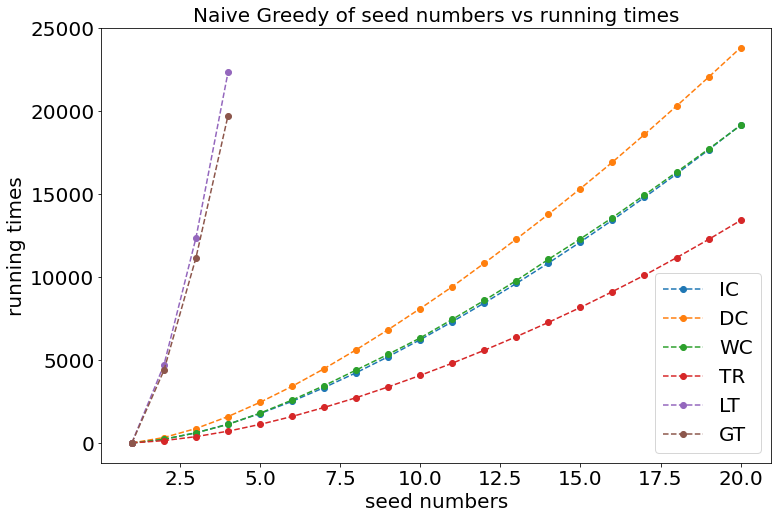

In [12]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(times_IC)+1), times_IC, 'o--', label = 'IC')
plt.plot(np.arange(1, len(times_DC)+1), times_DC, 'o--', label = 'DC')
plt.plot(np.arange(1, len(times_WC)+1), times_WC, 'o--', label = 'WC')
plt.plot(np.arange(1, len(times_TR)+1), times_TR, 'o--', label = 'TR')
plt.plot(np.arange(1, len(times_LT)+1), times_LT, 'o--', label = 'LT')
plt.plot(np.arange(1, len(times_GT)+1), times_GT, 'o--', label = 'GT')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('running times', fontsize=20)
plt.title('Naive Greedy of seed numbers vs running times', fontsize=20)
plt.legend(fontsize=20)